In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("netflix_userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration
0,1,NaN,10.0,United States,28.0,Male,Smartphone,1 Month
1,2,Premium,15.0,Canada,35.0,Female,Tablet,1 Month
2,3,Standard,12.0,United Kingdom,42.0,Male,Smart TV,1 Month
3,4,Standard,12.0,Australia,NaN,Female,Laptop,1 Month
4,5,Basic,10.0,Germany,33.0,Male,Smartphone,1 Month


In [2]:
df.tail()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration
65,66,Premium,15.0,France,29.0,Male,Smartphone,1 Month
66,67,Basic,10.0,Brazil,47.0,Female,Smart TV,1 Month
67,68,Standard,12.0,Mexico,33.0,Male,Tablet,1 Month
68,69,Premium,15.0,Spain,36.0,Female,Laptop,1 Month
69,70,Basic,10.0,Italy,41.0,Male,Smartphone,1 Month


In [3]:
print(df.shape)

(70, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User ID            70 non-null     int64  
 1   Subscription Type  65 non-null     object 
 2   Monthly Revenue    65 non-null     float64
 3   Country            70 non-null     object 
 4   Age                64 non-null     float64
 5   Gender             65 non-null     object 
 6   Device             70 non-null     object 
 7   Plan Duration      70 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.5+ KB


In [5]:
df.describe()

,User ID,Monthly Revenue,Age
count,70.000000,65.000000,64.000000
mean,35.500000,12.184615,36.500000
std,20.351085,2.068305,6.306963
min,1.000000,10.000000,26.000000
25%,18.250000,10.000000,31.000000
50%,35.500000,12.000000,36.000000
75%,52.750000,15.000000,41.000000
max,70.000000,15.000000,49.000000


In [6]:
df1=df.copy(deep=True)

In [7]:
df.isna().sum()

User ID              0
Subscription Type    5
Monthly Revenue      5
Country              0
Age                  6
Gender               5
Device               0
Plan Duration        0
dtype: int64

In [8]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)
df1.isna().sum()

User ID              0
Subscription Type    5
Monthly Revenue      5
Country              0
Age                  0
Gender               5
Device               0
Plan Duration        0
dtype: int64

In [9]:
me=df1["Monthly Revenue"].mean()
df1["Monthly Revenue"]=df1["Monthly Revenue"].fillna(me)
df1.isna().sum()

User ID              0
Subscription Type    5
Monthly Revenue      0
Country              0
Age                  0
Gender               5
Device               0
Plan Duration        0
dtype: int64

In [12]:
df1["Subscription Type"].fillna("Basic",inplace=True)
df1.isna().sum()

C:\Users\Jahnavi reddy\AppData\Local\Temp\ipykernel_6380\3203391711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Subscription Type"].fillna("Basic",inplace=True)


User ID              0
Subscription Type    0
Monthly Revenue      0
Country              0
Age                  0
Gender               5
Device               0
Plan Duration        0
dtype: int64

In [13]:
df1.dropna(inplace=True)
df1.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [14]:
df1["Subscription Type"].value_counts()

Subscription Type
Basic       27
Premium     19
Standard    19
Name: count, dtype: int64

In [15]:
df1["Gender"].value_counts()

Gender
Female    33
Male      32
Name: count, dtype: int64

In [16]:
df1["Country"].value_counts()

Country
Canada            7
United Kingdom    7
Australia         7
Germany           7
Mexico            7
Spain             7
United States     6
France            6
Italy             6
Brazil            5
Name: count, dtype: int64

In [17]:
mapping={"Basic":100,"Standard":200,"Premium":300}
df1["Subscription Type"]=df1["Subscription Type"].map(mapping)
df1.head()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration
0,1,100,10.0,United States,28.0,Male,Smartphone,1 Month
1,2,300,15.0,Canada,35.0,Female,Tablet,1 Month
2,3,200,12.0,United Kingdom,42.0,Male,Smart TV,1 Month
3,4,200,12.0,Australia,36.0,Female,Laptop,1 Month
4,5,100,10.0,Germany,33.0,Male,Smartphone,1 Month


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=["Country","Gender"]
for i in cols:
    df1[i]=le.fit_transform(df1[i])
df1.head()

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Plan Duration
0,1,100,10.0,9,28.0,1,Smartphone,1 Month
1,2,300,15.0,2,35.0,0,Tablet,1 Month
2,3,200,12.0,8,42.0,1,Smart TV,1 Month
3,4,200,12.0,0,36.0,0,Laptop,1 Month
4,5,100,10.0,4,33.0,1,Smartphone,1 Month


In [28]:
x=df1[["Age","Country","Monthly Revenue","Gender"]]
y=df1[["Subscription Type"]]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(x_train,y_train)

C:\Users\Jahnavi reddy\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [32]:
ypred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9230769230769231


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)

DecisionTreeClassifier()

In [34]:
ypred=dtc.predict(x)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,ypred)

array([[27,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 19]], dtype=int64)

In [35]:
from sklearn.svm import LinearSVC,SVC
svc_lin=SVC(kernel="linear").fit(x,y)
rbf_svc=SVC(kernel="rbf").fit(x,y)
poly_svc3=SVC(kernel="poly",degree=3).fit(x,y)
poly_svc4=SVC(kernel="poly",degree=4).fit(x,y)
print("Linear: ",svc_lin.score(x,y))
print("RBF: ",rbf_svc.score(x,y))
print("Poly deg3: ",poly_svc3.score(x,y))
print("Poly deg4: ",poly_svc4.score(x,y))

Linear:  0.8923076923076924
RBF:  0.6615384615384615
Poly deg3:  0.8615384615384616
Poly deg4:  0.8769230769230769


C:\Users\Jahnavi reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jahnavi reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jahnavi reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jahnavi reddy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Text(0.4444444444444444, 0.9285714285714286, 'Monthly Revenue <= 13.592\ngini = 0.657\nsamples = 65\nvalue = [27, 19, 19]\nclass = Premium'),
 Text(0.2222222222222222, 0.7857142857142857, 'Monthly Revenue <= 11.0\ngini = 0.509\nsamples = 46\nvalue = [26.0, 19.0, 1.0]\nclass = Premium'),
 Text(0.3333333333333333, 0.8571428571428572, 'True  '),
 Text(0.1111111111111111, 0.6428571428571429, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]\nclass = Premium'),
 Text(0.3333333333333333, 0.6428571428571429, 'Age <= 42.5\ngini = 0.381\nsamples = 25\nvalue = [5, 19, 1]\nclass = Basic'),
 Text(0.2222222222222222, 0.5, 'Monthly Revenue <= 12.092\ngini = 0.244\nsamples = 22\nvalue = [2, 19, 1]\nclass = Basic'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0]\nclass = Basic'),
 Text(0.3333333333333333, 0.35714285714285715, 'Country <= 6.5\ngini = 0.625\nsamples = 4\nvalue = [2, 1, 1]\nclass = Premium'),
 Text(0.2222222222222222, 0.21428571428571427, 'Age <

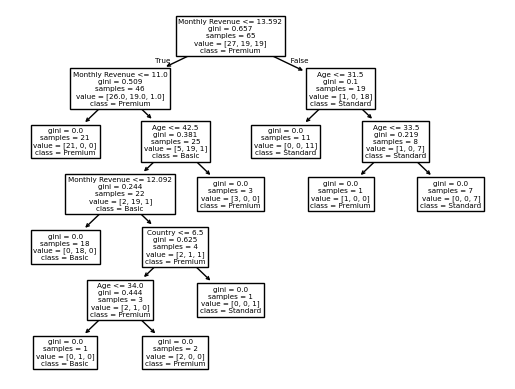

In [36]:
from sklearn.tree import plot_tree
plot_tree(dtc,feature_names=["Age","Country","Monthly Revenue","Gender"],class_names=["Premium","Basic","Standard"])